In [1]:
import random

def majority_votes(votes):
    """
    xxx
    """
    
    
    vote_counts = {}
    #text.split()
    for vote in votes:
        # Known word
        if vote in vote_counts:
            vote_counts[vote] += 1
        else:
            vote_counts[vote] = 1
            
            
    winners = []
    max_counts = max(vote_counts.values())
    for vote,count in vote_counts.items():
        if count == max_counts:
            winners.append(vote)
        
    return random.choice(winners)

In [2]:
votes = [1,2,1,2,3,3,4,4,3,3]
vote_counts = majority_votes(votes)

In [3]:
majority_votes(votes)

3

In [4]:
import scipy.stats as ss

def majority_votes_fast(votes):
    """
    Return mode: the most common elements in votes
    """
    
    mode, count = ss.mstats.mode(votes)
    return mode

In [5]:
majority_votes_fast(votes)

array([ 3.])

## kNN

In [6]:
import numpy as np

In [7]:
points = np.array([[1,1],[1,2],[1,3],[2,1],[2,2],[2,3],[3,1],[3,2],[3,3]])

In [8]:
p = np.array([2.5,2])

In [9]:
def distance(p1,p2):
    return np.sqrt(np.sum(np.power(p1-p2,2)))

[0.5, 3.5, 0.5, 3.5]

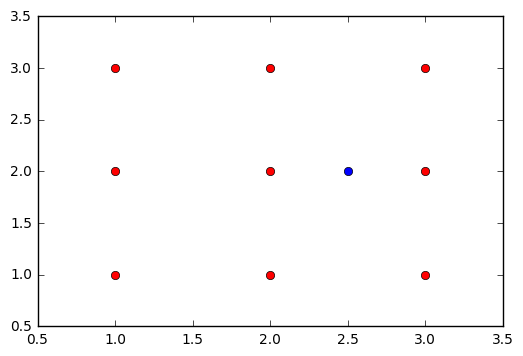

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline



distances = np.zeros(points.shape[0])

for i in range(len(distances)):
    distances[i] = distance(p, points[i])
    

plt.plot(points[:,0], points[:,1],"ro")
plt.plot(p[0],p[1], "bo")
plt.axis([0.5,3.5,0.5,3.5])

In [11]:
distances

array([ 1.80277564,  1.5       ,  1.80277564,  1.11803399,  0.5       ,
        1.11803399,  1.11803399,  0.5       ,  1.11803399])

In [12]:
ind = np.argsort(distances)

In [13]:
ind

array([4, 7, 3, 5, 6, 8, 1, 0, 2])

In [14]:
def find_nearest_neighbors(p, points, k=5):
    
    distances = np.zeros(points.shape[0])
    
    for i in range(len(distances)):
        distances[i] = distance(p,points[i])
    # sorts distances and returns indices
    ind = np.argsort(distances)
    return ind[:k]

In [15]:
ind = find_nearest_neighbors(p,points,2)

In [16]:
print points[ind]

[[2 2]
 [3 2]]


In [22]:
def knn_predict(p, points, outcomes, k=5):
    ind = find_nearest_neighbors(p, points, k)
    return majority_votes(outcomes[ind])
    # predict the class p based on majority vote
    

In [23]:
outcomes = np.array([0,0,0,0,1,1,1,1,1])

In [24]:
len(outcomes)

9

In [25]:
knn_predict(np.array([2.5,2.7]), points, outcomes, k=2)

1

## Generate synthetic data

In [26]:
ss.norm(0,1).rvs((5,2))

array([[-1.33994811, -0.26483877],
       [-0.43855831, -0.27611362],
       [ 0.34127785,  1.27031183],
       [ 1.16803597,  0.91462578],
       [ 0.61331056, -1.05199787]])

In [27]:
ss.norm(1,1).rvs((5,2))

array([[ 0.25329302,  1.38195767],
       [ 1.75755071,  2.60787676],
       [ 0.70010048,  0.54639905],
       [ 3.03894707, -0.42141291],
       [-0.81781232,  3.15700001]])

In [30]:
def generate_synth_data(n=50):
    """
    Create two sets of points from bivariate normal distribution
    """
    points = np.concatenate((ss.norm(0,1).rvs((n,2)),ss.norm(1,1).rvs((n,2))), axis=0)
    
    outcomes = np.concatenate ((np.repeat(0,n),np.repeat(1,n)))
    
    return (points,outcomes)

In [31]:
(points,outcomes) = generate_synth_data()

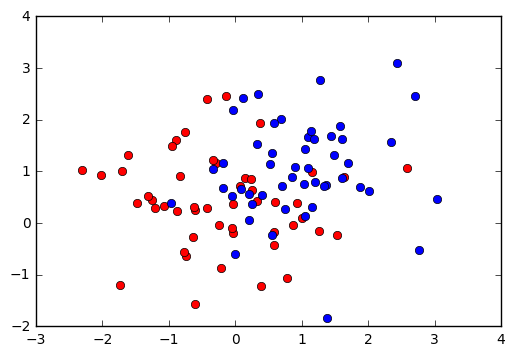

In [37]:
n = 50
plt.figure()
plt.plot(points[:n,0],points[:n,1], "ro")
plt.plot(points[n:,0],points[n:,1], "bo")
plt.savefig('bivardata.pdf')

## kNN prediction

In [38]:
def make_prediction_grid(predictors, outcomes, limits, h, k):
    """
    Classify each point on the prediction grid.
    """
    
    (x_min, x_max, y_min, y_max) = limits
    xs = np.arange(x_min,x_max, h)
    ys = np.arange(y_min,y_max, h)
    # 
    xx, yy = np.meshgrid(xs, ys)
    
    prediction_grid = np.zeros(xx.shape, dtype=int)
    for i,x in enumerate(xs):
        for j,y in enumerate(ys):
            p = np.array([x,y])
            prediction_grid[j,i] = knn_predict(p, predictors, outcomes, k)
    
    return (xx, yy, prediction_grid)
    

In [41]:
xs = np.arange(0,4,1)
ys = np.arange(0,5,1)


# all x and y values
np.meshgrid(xs, ys)

[array([[0, 1, 2, 3],
        [0, 1, 2, 3],
        [0, 1, 2, 3],
        [0, 1, 2, 3],
        [0, 1, 2, 3]]), array([[0, 0, 0, 0],
        [1, 1, 1, 1],
        [2, 2, 2, 2],
        [3, 3, 3, 3],
        [4, 4, 4, 4]])]

In [42]:
(predictors, outcomes) = generate_synth_data()

In [43]:
predictors.shape

(100, 2)

In [44]:
outcomes.shape

(100,)

In [46]:
def plot_prediction_grid (xx, yy, prediction_grid, filename):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.savefig(filename)

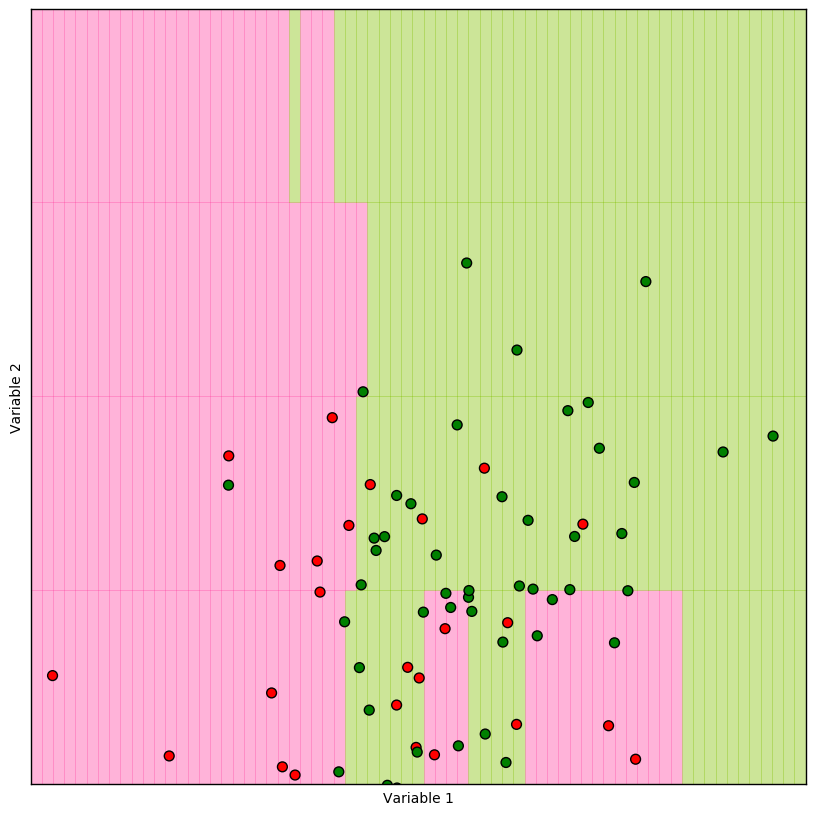

In [47]:
k=5; filename="knn_synth_5.pdf"; limits = (-3, 4, -3, 4); h=0.1
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid(xx, yy, prediction_grid, filename)

## Aplying the kNN with the scikit learn

In [48]:
from sklearn import datasets
iris = datasets.load_iris()

In [49]:
iris["data"]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [50]:
predictors = iris.data[:, 0:2]
outcomes = iris.target

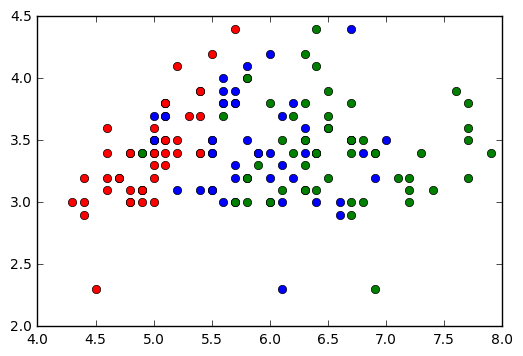

In [53]:
plt.plot(predictors[outcomes==0][:,0],predictors[outcomes==0][:,1],"ro")
plt.plot(predictors[outcomes==1][:,0],predictors[outcomes==0][:,1],"bo")
plt.plot(predictors[outcomes==2][:,0],predictors[outcomes==0][:,1],"go")

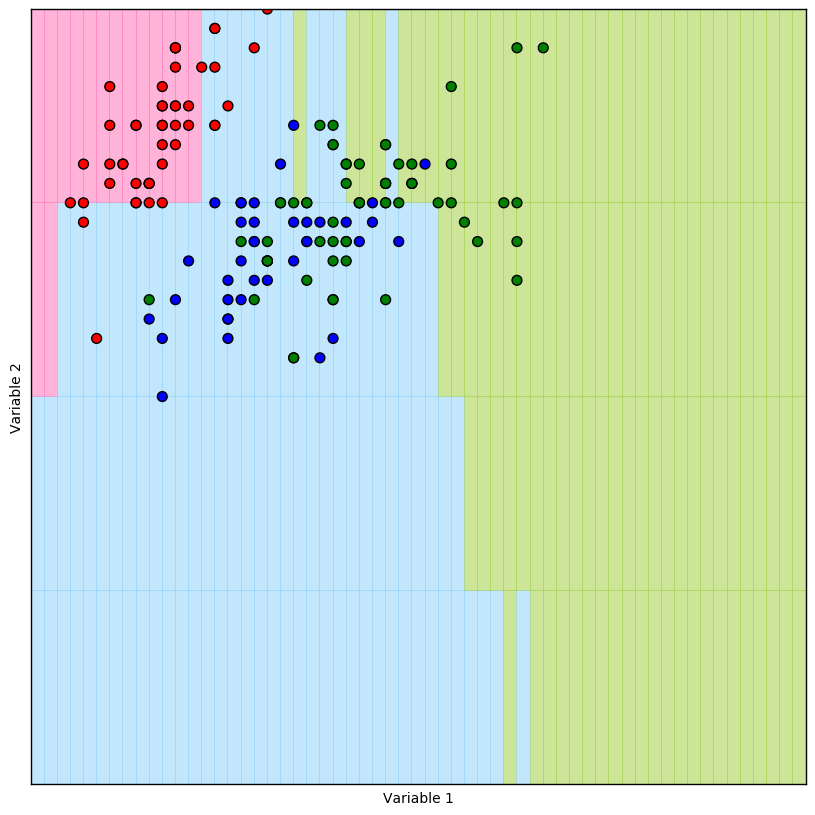

In [61]:
k=5; filename="iris_grid.pdf"; limits = (4, 10, 2, 4.5); h=0.1
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid(xx, yy, prediction_grid, filename)

In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(predictors, outcomes)
sk_predictions = knn.predict(predictors)

In [65]:
sk_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1])

In [67]:
my_prediction = np.array([knn_predict(p, predictors, outcomes, 5) for p in predictors])

In [69]:
np.mean(sk_predictions == my_prediction)*100

96.0

In [70]:
np.mean(sk_predictions == outcomes)*100

83.333333333333343

In [73]:
np.mean(my_prediction == outcomes)*100

84.666666666666671